In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [2]:
!pip list

Package                  Version
------------------------ -----------
absl-py                  0.15.0
aiohttp                  3.8.3
aiosignal                1.2.0
anyio                    3.5.0
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
astor                    0.8.1
asttokens                2.0.5
astunparse               1.6.3
async-timeout            4.0.2
attrs                    22.1.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.11.1
bleach                   4.1.0
blinker                  1.4
brotlipy                 0.7.0
cachetools               4.2.2
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       2.0.4
clang                    5.0
click                    8.0.4
colorama                 0.4.5
contourpy                1.0.6
cryptography             38.0.1
cycler                   0.11.0
debugpy                  1.5.1
decorator                5.1.1
defusedxml            

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [5]:
ds = tfds.load('mnist',split='train')

In [6]:
ds.as_numpy_iterator().next()['label']

4

In [7]:
import numpy as np

In [8]:
dataiterator = ds.as_numpy_iterator()

In [9]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

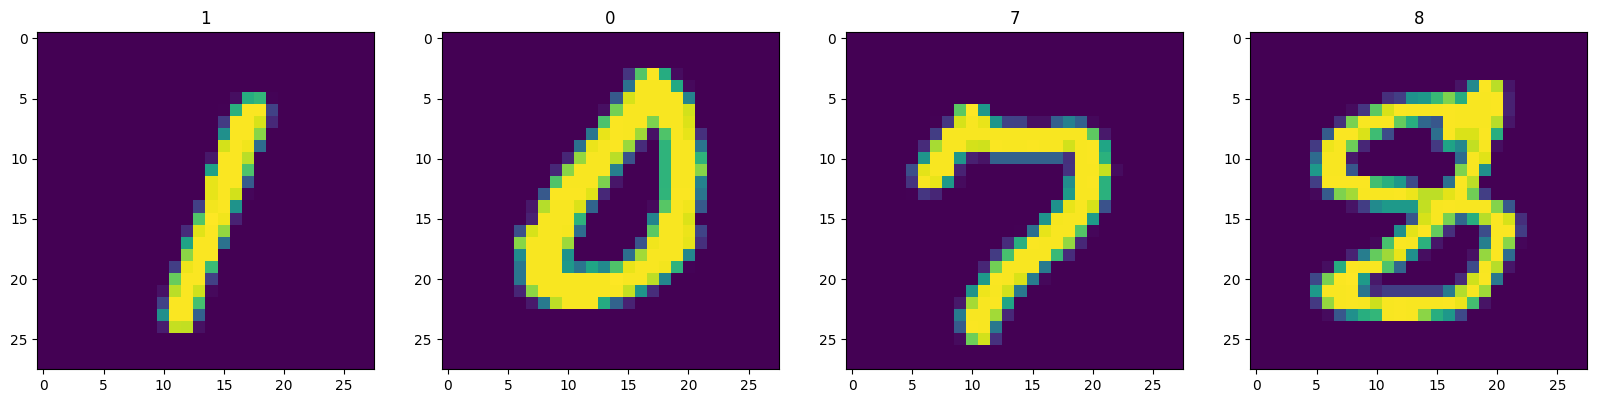

In [10]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [11]:
def scale_images(data):
    image = data['image']
    return image / 255

In [12]:
ds = tfds.load('mnist',split='train')
ds = ds.map(scale_images)

ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [13]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [15]:
def build_generator():
    model = Sequential()
    model.add(Dense(units=7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
    
    return model

In [16]:
generator = build_generator()

In [17]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              809088    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 128)       409728    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 128)       0

In [18]:
img = generator.predict(np.random.randn(4,128))

In [19]:
img.shape

(4, 28, 28, 1)

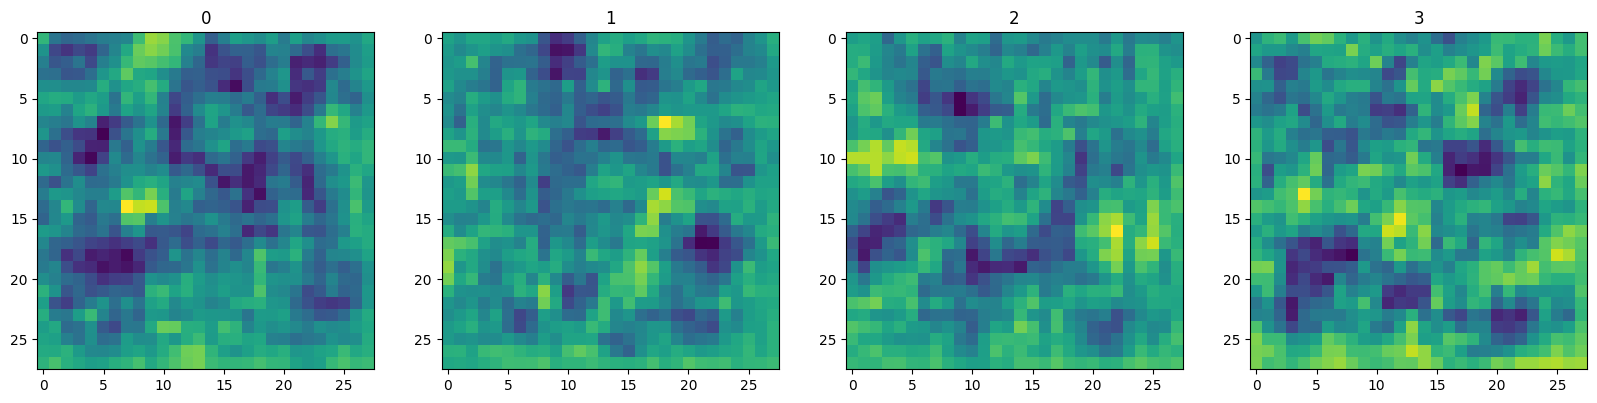

In [20]:
img = generator.predict(np.random.randn(4,128))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [21]:
def build_discrimination():
    model = Sequential()
    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [22]:
discriminator = build_discrimination()

In [23]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)      

In [24]:
img = tf.expand_dims(img[0], axis=0)

In [25]:
# discriminator.predict(img)

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.000001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [28]:
from tensorflow.keras.models import Model

In [29]:
class MnistGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        
    def train_step(self, batch_real_images):
        real_images = batch_real_images
        fake_images = self.generator(tf.random.normal((128,128)), training=False)
        
        with tf.GradientTape() as d_tape:
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
        
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
        
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal((128,128)), training=True)
            predict_labels = self.discriminator(gen_images, training=False)
            total_g_loss = self.g_loss(tf.zeros_like(predict_labels), predict_labels)
            
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

    
        

In [30]:
mnistgan = MnistGAN(generator, discriminator)

In [31]:
mnistgan.generator

In [32]:
mnistgan.discriminator

In [33]:
mnistgan.compile(g_opt, d_opt, g_loss, d_loss)

In [34]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [35]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        
    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [36]:
hist = mnistgan.fit(ds, epochs=1000,callbacks=[ModelMonitor()])

Epoch 1/1000
469/469 [==============================] - 41s 76ms/step - d_loss: 0.6480 - g_loss: 0.9225
Epoch 2/1000
469/469 [==============================] - 35s 74ms/step - d_loss: 0.5818 - g_loss: 0.9349
Epoch 3/1000
469/469 [==============================] - 35s 73ms/step - d_loss: 0.4865 - g_loss: 0.6924
Epoch 4/1000
469/469 [==============================] - 35s 74ms/step - d_loss: 0.4819 - g_loss: 0.6968
Epoch 5/1000
469/469 [==============================] - 33s 69ms/step - d_loss: 0.4788 - g_loss: 0.7043
Epoch 6/1000
469/469 [==============================] - 33s 71ms/step - d_loss: 0.4714 - g_loss: 0.7214
Epoch 7/1000
469/469 [==============================] - 34s 72ms/step - d_loss: 0.4526 - g_loss: 0.7698
Epoch 8/1000
469/469 [==============================] - 35s 75ms/step - d_loss: 0.4015 - g_loss: 0.9412
Epoch 9/1000
469/469 [==============================] - 34s 71ms/step - d_loss: 0.3170 - g_loss: 1.4570
Epoch 10/1000
469/469 [==============================] - 32s 68m

KeyboardInterrupt: 

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

In [ ]:
imgs = generator.predict(tf.random.normal((16,128)))

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
# generator.save('generatorwbf.h5')
# discriminator.save('discriminatorwbf.h5')

In [39]:
new_model = tf.keras.models.load_model('discriminatorwbf.h5')

In [40]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)      